<a href="https://colab.research.google.com/github/SigalapalliPrameela/Image_Recognition_ML/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sigalapalliprameela","key":"f09bc0d49e9413d19a43411600b7714e"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(f"train shape: {x_train.shape},test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train shape: (60000, 28, 28),test shape: (10000, 28, 28)


In [7]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"Train reshaped:{x_train.shape}")

Train reshaped:(60000, 28, 28, 1)


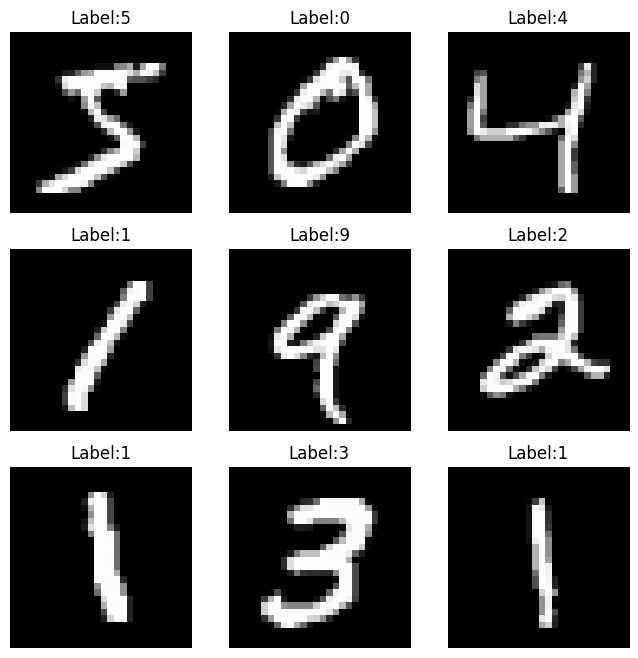

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.show()

In [9]:
(x_train_c10,y_train_c10),(x_test_c10,y_test_c10)=tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10/255.0
x_test_c10 = x_test_c10/255.0
print(f"CIFAR-10 Train shape:{x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 Train shape:(50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(62,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 62)     │        17,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 62)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1550)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       198,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,056 (851.78 KB)

 Trainable params: 218,056 (851.78 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history= model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8976 - loss: 0.3377 - val_accuracy: 0.9832 - val_loss: 0.0548
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9837 - loss: 0.0522 - val_accuracy: 0.9778 - val_loss: 0.0723
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9863 - val_loss: 0.0457
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9862 - val_loss: 0.0449
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9886 - val_loss: 0.0433


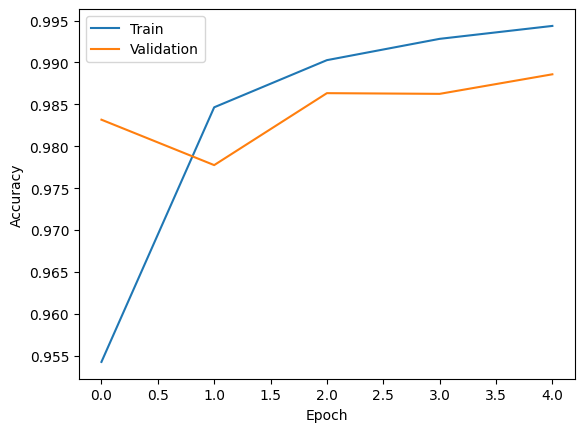

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9882 - loss: 0.0380
Test Accuracy:0.9910
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [14]:
from tensorflow.keras.layers import Dropout
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),

    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 92ms/step - accuracy: 0.3429 - loss: 1.8174 - val_accuracy: 0.5574 - val_loss: 1.2301
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.5103 - loss: 1.3713 - val_accuracy: 0.5726 - val_loss: 1.1925
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.5545 - loss: 1.2661 - val_accuracy: 0.6417 - val_loss: 1.0206
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.5833 - loss: 1.1978 - val_accuracy: 0.6452 - val_loss: 1.0309
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.5982 - loss: 1.1451 - val_accuracy: 0.6689 - val_loss: 0.9460
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.6100 - loss: 1.1130 - val_accuracy: 0.6061 - val_loss: 1.1336
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.6278 - loss: 1.0680 - val_accuracy: 0.6314 - val_loss: 1.0333
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.6364 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.84      0.84      0.84      1000
           2       0.82      0.35      0.49      1000
           3       0.58      0.42      0.49      1000
           4       0.66      0.61      0.63      1000
           5       0.59      0.65      0.62      1000
           6       0.58      0.89      0.70      1000
           7       0.67      0.82      0.74      1000
           8       0.92      0.70      0.80      1000
           9       0.62      0.92      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.68     10000
weighted avg       0.71      0.69      0.68     10000



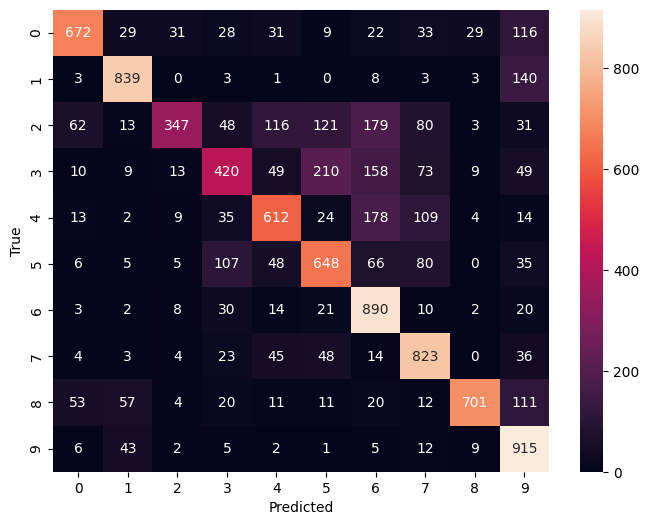

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np


y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 207M/218M [00:01<00:00, 130MB/s]
100% 218M/218M [00:01<00:00, 152MB/s]


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,
                                            class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,
                                            class_mode='binary',subset='training')

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,epochs=5,validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 614s 2s/step - accuracy: 0.7909 - loss: 0.5410 - val_accuracy: 0.7982 - val_loss: 0.4956
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.8018 - loss: 0.4980 - val_accuracy: 0.7990 - val_loss: 0.4847
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.7945 - loss: 0.4962 - val_accuracy: 0.7995 - val_loss: 0.4766
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.8027 - loss: 0.4693 - val_accuracy: 0.8001 - val_loss: 0.4579
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.7945 - loss: 0.4666 - val_accuracy: 0.8048 - val_loss: 0.4220


In [23]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1902s 7s/step - accuracy: 0.8002 - loss: 0.4869 - val_accuracy: 0.8107 - val_loss: 0.4122
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1847s 7s/step - accuracy: 0.7987 - loss: 0.4562 - val_accuracy: 0.8157 - val_loss: 0.4069
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1887s 7s/step - accuracy: 0.8046 - loss: 0.4276 - val_accuracy: 0.8209 - val_loss: 0.3977


In [25]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

251/251 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step


/tmp/ipython-input-1939617145.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


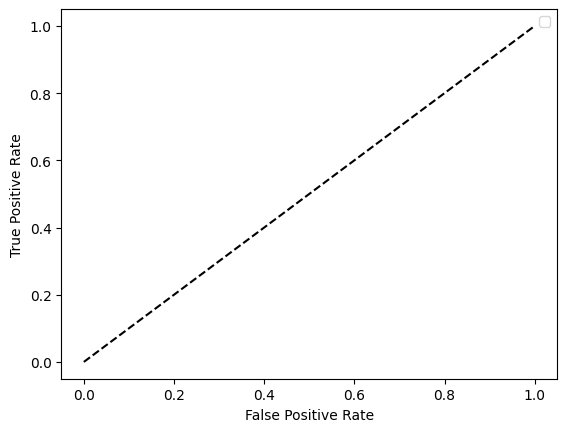

In [28]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title(f'ROC Curve (AUC={roc_auc:.2f})')
plt.legend()
plt.show()

In [36]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'dog.jpeg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving dog.jpeg to dog (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Dog


In [46]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'cat.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)



img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
# img_array = img_array / 255.0

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving images.jpeg to images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: Dog


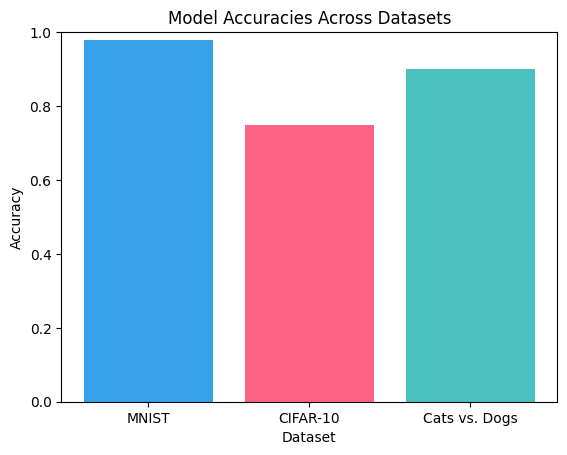

In [37]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [41]:
print("Raw prediction output:", prediction)


Raw prediction output: [[0.8464332]]
